 # 【問題1】練習のために特徴量の選択
データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。

In [1]:
cd ..

/Users/niikurasayaka/diveintocode-ml


In [2]:
cd Week3/data

/Users/niikurasayaka/diveintocode-ml/Week3/data


In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
df = pd.read_csv("train.csv")

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df_2line = df[["GrLivArea", "YearBuilt"]]
target = df["SalePrice"]

# 【問題2】線形回帰による推定と評価
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。

sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation

評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。

sklearn.metrics.mean_squared_error — scikit-learn 0.21.3 documentation

可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。

In [7]:
#前処理
df_2line.isnull().sum()

GrLivArea    0
YearBuilt    0
dtype: int64

欠損値なし

In [8]:
#相関
print("GrLivAreaとの相関は%.3f" % target.corr(df_2line["GrLivArea"]))
print("YearBuiltとの相関は%.3f" % target.corr(df_2line["YearBuilt"]))

GrLivAreaとの相関は0.709
YearBuiltとの相関は0.523


GrLivAreaとの相関は結構ある

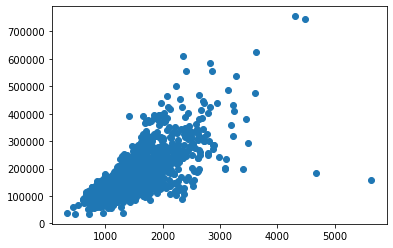

In [9]:
#散布図
plt.scatter(df_2line["GrLivArea"], target)

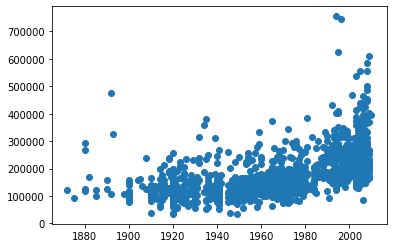

In [10]:
plt.scatter(df_2line["YearBuilt"], target)

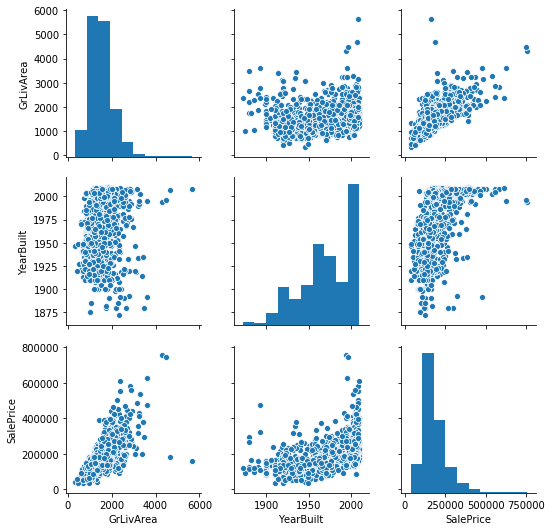

In [11]:
sns.pairplot(pd.concat([df_2line, target], axis=1))

In [12]:
#それぞれの特徴量と目的変数との学習
X1 = np.array([df_2line["GrLivArea"]]).reshape(-1, 1)
X2 = np.array([df_2line["YearBuilt"]]).reshape(-1, 1)
y = target.values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.3, random_state=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(df_2line, target, test_size=0.3, random_state=1)

"GrLivArea"と”SalePriceとの学習

MSE(train) : 3.13e+09
MSE(test) : 3.20e+09
R2_Score(train) : 0.474
R2_Score(test) : 0.551


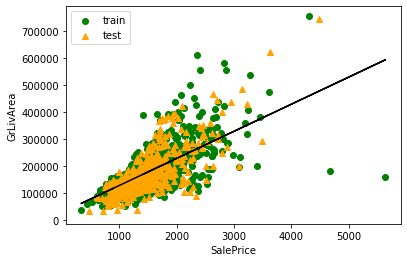

In [16]:
lr1 = LinearRegression()

lr1.fit(X1_train, y1_train)

y1_train_pred_lin = lr1.predict(X1_train)
y1_test_pred_lin = lr1.predict(X1_test)

print("MSE(train) : %.2e" % mean_squared_error(y1_train, y1_train_pred_lin))
print("MSE(test) : %.2e" % mean_squared_error(y1_test, y1_test_pred_lin))
print("R2_Score(train) : %.3f" % r2_score(y1_train, y1_train_pred_lin))
print("R2_Score(test) : %.3f" % r2_score(y1_test, y1_test_pred_lin))

plt.scatter(X1_train, y1_train, color="green", label="train")
plt.scatter(X1_test, y1_test, marker="^", color="orange", label="test")
plt.plot(X1_train, y1_train_pred_lin, color="black")
plt.xlabel("SalePrice")
plt.ylabel("GrLivArea")
plt.legend(loc="upper left")
plt.show()

YearBuilt と　SalePriceとの学習

MSE(train) : 4.46e+09
MSE(test) : 4.88e+09
R2_Score(train) : 0.250
R2_Score(test) : 0.316


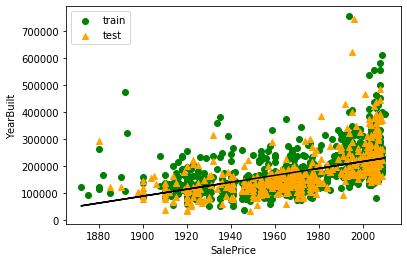

In [17]:
lr2 = LinearRegression()

lr2.fit(X2_train, y2_train)


y2_train_pred_lin = lr2.predict(X2_train)
y2_test_pred_lin = lr2.predict(X2_test)

print("MSE(train) : %.2e" % mean_squared_error(y2_train, y2_train_pred_lin))
print("MSE(test) : %.2e" % mean_squared_error(y2_test, y2_test_pred_lin))
print("R2_Score(train) : %.3f" % r2_score(y2_train, y2_train_pred_lin))
print("R2_Score(test) : %.3f" % r2_score(y2_test, y2_test_pred_lin))

plt.scatter(X2_train, y2_train, color="green", label="train")
plt.scatter(X2_test, y2_test, marker="^", color="orange", label="test")
plt.plot(X2_train, y2_train_pred_lin, color="black")
plt.xlabel("SalePrice")
plt.ylabel("YearBuilt")
plt.legend(loc="upper left")
plt.show()

#２特徴量と目的変数を合わせて学習

In [50]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_train_pred_lin = lr.predict(X_train)
y_test_pred_lin = lr.predict(X_test)

print("MSE(train) : %.2e" % mean_squared_error(y_train, y_train_pred_lin))
print("MSE(test) : %.2e" % mean_squared_error(y_test, y_test_pred_lin))
print("R2_Score(train) : %.3f" % r2_score(y_train, y_train_pred_lin))
print("R2_Score(test) : %.3f" % r2_score(y_test, y_test_pred_lin))
lin_score = mean_squared_error(y_test, y_test_pred_lin)

MSE(train) : 2.26e+09
MSE(test) : 2.04e+09
R2_Score(train) : 0.621
R2_Score(test) : 0.714


# 【問題3】手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。

線形回帰
SVM
決定木
ランダムフォレスト

## SVR

R2_Score(train) : 0.472
R2_Score(test) : 0.543
mean_squared_error(train) : 3.14e+09
mean_squared_error(test) : 3.26e+09


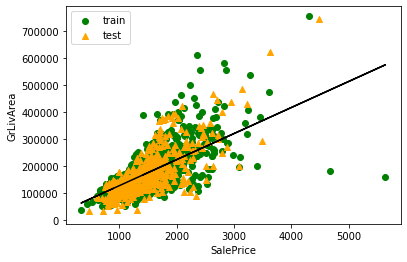

In [30]:
from sklearn.svm import SVR
svr1 = SVR(kernel='linear')

svr1.fit(X1_train, y1_train)

y1_train_pred_svr = svr1.predict(X1_train)
y1_test_pred_svr = svr1.predict(X1_test)

print("R2_Score(train) : %.3f" % r2_score(y1_train, y1_train_pred_svr))
print("R2_Score(test) : %.3f" % r2_score(y1_test, y1_test_pred_svr))

print("mean_squared_error(train) : %.2e" % mean_squared_error(y1_train, y1_train_pred_svr))
print("mean_squared_error(test) : %.2e" % mean_squared_error(y1_test, y1_test_pred_svr))

plt.scatter(X1_train, y1_train, color="green", label="train")
plt.scatter(X1_test, y1_test, marker="^", color="orange", label="test")
plt.plot(X1_train, y1_train_pred_svr, color="black")
plt.xlabel("SalePrice")
plt.ylabel("GrLivArea")
plt.legend(loc="upper left")
plt.show()

R2_Score(train) : 0.193
R2_Score(test) : 0.254
mean_squared_error(train) : 4.80e+09
mean_squared_error(test) : 5.32e+09


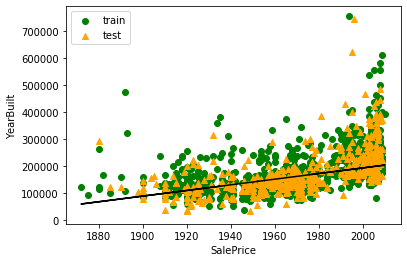

In [41]:
svr2 = SVR(kernel='linear')

svr2.fit(X2_train, y2_train)

y2_train_pred_svr = svr2.predict(X2_train)
y2_test_pred_svr = svr2.predict(X2_test)

print("R2_Score(train) : %.3f" % r2_score(y2_train, y2_train_pred_svr))
print("R2_Score(test) : %.3f" % r2_score(y2_test, y2_test_pred_svr))

print("mean_squared_error(train) : %.2e" % mean_squared_error(y2_train, y2_train_pred_svr))
print("mean_squared_error(test) : %.2e" % mean_squared_error(y2_test, y2_test_pred_svr))

plt.scatter(X2_train, y2_train, color="green", label="train")
plt.scatter(X2_test, y2_test, marker="^", color="orange", label="test")
plt.plot(X2_train, y2_train_pred_svr, color="black")
plt.xlabel("SalePrice")
plt.ylabel("YearBuilt")
plt.legend(loc="upper left")
plt.show()

In [49]:
svr = SVR(kernel="linear")

svr.fit(X_train, y_train)

y_train_pred_svr = svr.predict(X_train)
y_test_pred_svr = svr.predict(X_test)

print("R2_Score(train) : %.3f" % r2_score(y_train, y_train_pred_svr))
print("R2_Score(test) : %.3f" % r2_score(y_test, y_test_pred_svr))

print("mean_squared_error(train) : %.2e" % mean_squared_error(y_train, y_train_pred_svr))
print("mean_squared_error(test) : %.2e" % mean_squared_error(y_test, y_test_pred_svr))
svm_score = mean_squared_error(y_test, y_test_pred_svr)

R2_Score(train) : 0.605
R2_Score(test) : 0.677
mean_squared_error(train) : 2.35e+09
mean_squared_error(test) : 2.31e+09


## 決定木

R2_Score(train) : 0.522
R2_Score(test) : 0.513
mean_squared_error(train) : 2.84e+09
mean_squared_error(test) : 3.47e+09


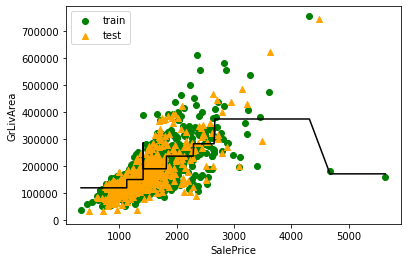

In [38]:
from sklearn.tree import DecisionTreeRegressor
tree1 = DecisionTreeRegressor(max_depth=3)

tree1.fit(X1_train, y1_train)

y1_train_pred_tree = tree1.predict(X1_train)
y1_test_pred_tree = tree1.predict(X1_test)

print("R2_Score(train) : %.3f" % r2_score(y1_train, y1_train_pred_tree))
print("R2_Score(test) : %.3f" % r2_score(y1_test, y1_test_pred_tree))

print("mean_squared_error(train) : %.2e" % mean_squared_error(y1_train, y1_train_pred_tree))
print("mean_squared_error(test) : %.2e" % mean_squared_error(y1_test, y1_test_pred_tree))

sort_idx = X1_train.flatten().argsort()

plt.scatter(X1_train, y1_train, color="green", label="train")
plt.scatter(X1_test, y1_test, marker="^", color="orange", label="test")
plt.plot(X1_train[sort_idx], tree1.predict(X1_train[sort_idx]), color='black')
plt.xlabel("SalePrice")
plt.ylabel("GrLivArea")
plt.legend(loc="upper left")
plt.show()

R2_Score(train) : 0.373
R2_Score(test) : 0.414
mean_squared_error(train) : 3.73e+09
mean_squared_error(test) : 4.18e+09


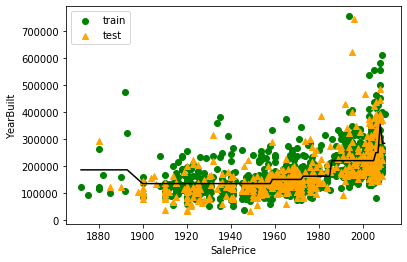

In [42]:
from sklearn.tree import DecisionTreeRegressor
tree2 = DecisionTreeRegressor(max_depth=3)

tree2.fit(X2_train, y2_train)

y2_train_pred_tree = tree2.predict(X2_train)
y2_test_pred_tree = tree2.predict(X2_test)

print("R2_Score(train) : %.3f" % r2_score(y2_train, y2_train_pred_tree))
print("R2_Score(test) : %.3f" % r2_score(y2_test, y2_test_pred_tree))

print("mean_squared_error(train) : %.2e" % mean_squared_error(y2_train, y2_train_pred_tree))
print("mean_squared_error(test) : %.2e" % mean_squared_error(y2_test, y2_test_pred_tree))

sort_idx = X2_train.flatten().argsort()

plt.scatter(X2_train, y2_train, color="green", label="train")
plt.scatter(X2_test, y2_test, marker="^", color="orange", label="test")
plt.plot(X2_train[sort_idx], tree2.predict(X2_train[sort_idx]), color='black')
plt.xlabel("SalePrice")
plt.ylabel("YearBuilt")
plt.legend(loc="upper left")
plt.show()

In [51]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train_std, y_train)
y_train_pred_tree = tree.predict(X_train_std)
y_test_pred_tree = tree.predict(X_test_std)
print("R2_Score(train) : %.3f" % r2_score(y_train, y_train_pred_tree))
print("R2_Score(test) : %.3f" % r2_score(y_test, y_test_pred_tree))

print("mean_squared_error(train) : %.2e" % mean_squared_error(y_train, y_train_pred_tree))
print("mean_squared_error(test) : %.2e" % mean_squared_error(y_test, y_test_pred_tree))
tree_score = mean_squared_error(y_test, y_test_pred_tree)

R2_Score(train) : 0.640
R2_Score(test) : 0.642
mean_squared_error(train) : 2.14e+09
mean_squared_error(test) : 2.56e+09


## ランダムフォレスト

R2_Score(train) : 0.530
R2_Score(test) : 0.525
mean_squared_error(train) : 2.80e+09
mean_squared_error(test) : 3.39e+09


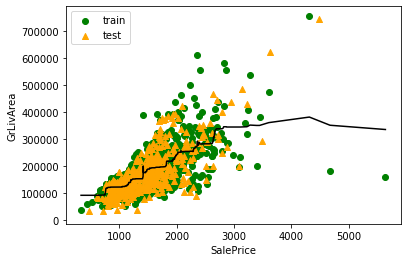

In [45]:
from sklearn.ensemble import RandomForestRegressor
forest1 = RandomForestRegressor(max_depth=3)

forest1.fit(X1_train, y1_train)

y1_train_pred_forest = forest1.predict(X1_train)
y1_test_pred_forest = forest1.predict(X1_test)

print("R2_Score(train) : %.3f" % r2_score(y1_train, y1_train_pred_forest))
print("R2_Score(test) : %.3f" % r2_score(y1_test, y1_test_pred_forest))

print("mean_squared_error(train) : %.2e" % mean_squared_error(y1_train, y1_train_pred_forest))
print("mean_squared_error(test) : %.2e" % mean_squared_error(y1_test, y1_test_pred_forest))

sort_idx = X1_train.flatten().argsort()

plt.scatter(X1_train, y1_train, color="green", label="train")
plt.scatter(X1_test, y1_test, marker="^", color="orange", label="test")
plt.plot(X1_train[sort_idx], forest1.predict(X1_train[sort_idx]), color='black')
plt.xlabel("SalePrice")
plt.ylabel("GrLivArea")
plt.legend(loc="upper left")
plt.show()

R2_Score(train) : 0.380
R2_Score(test) : 0.412
mean_squared_error(train) : 3.69e+09
mean_squared_error(test) : 4.20e+09


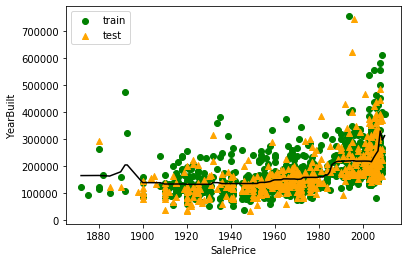

In [46]:
from sklearn.ensemble import RandomForestRegressor
forest2 = RandomForestRegressor(max_depth=3)

forest2.fit(X2_train, y2_train)

y2_train_pred_forest = forest2.predict(X2_train)
y2_test_pred_forest = forest2.predict(X2_test)

print("R2_Score(train) : %.3f" % r2_score(y2_train, y2_train_pred_forest))
print("R2_Score(test) : %.3f" % r2_score(y2_test, y2_test_pred_forest))

print("mean_squared_error(train) : %.2e" % mean_squared_error(y2_train, y2_train_pred_forest))
print("mean_squared_error(test) : %.2e" % mean_squared_error(y2_test, y2_test_pred_forest))

sort_idx = X2_train.flatten().argsort()

plt.scatter(X2_train, y2_train, color="green", label="train")
plt.scatter(X2_test, y2_test, marker="^", color="orange", label="test")
plt.plot(X2_train[sort_idx], forest2.predict(X2_train[sort_idx]), color='black')
plt.xlabel("SalePrice")
plt.ylabel("YearBuilt")
plt.legend(loc="upper left")
plt.show()

In [54]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
y_train_pred_forest = forest.predict(X_train)
y_test_pred_forest = forest.predict(X_test)
print("R2_Score(train) : %.3f" % r2_score(y_train, y_train_pred_forest))
print("R2_Score(test) : %.3f" % r2_score(y_test, y_test_pred_forest))

print("mean_squared_error(train) : %.2e" % mean_squared_error(y_train, y_train_pred_forest))
print("mean_squared_error(test) : %.2e" % mean_squared_error(y_test, y_test_pred_forest))
forest_score = mean_squared_error(y_test, y_test_pred_forest)

R2_Score(train) : 0.957
R2_Score(test) : 0.745
mean_squared_error(train) : 2.54e+08
mean_squared_error(test) : 1.82e+09


In [66]:
mse_score = pd.DataFrame([{"linear" : lin_score,
                   "svm": svm_score,
                   "tree": tree_score,
                   "forest": forest_score}])
mse_score

,linear,svm,tree,forest
0,2.044934e+09,2.309175e+09,2.555024e+09,1.820434e+09


ランダムフォレストが一番よく、DecisionTreeが一番悪い。

# 独自学習

In [67]:
df = pd.read_csv("train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## 欠損値処理をする。

In [68]:
total = df.isnull().sum().sort_values(ascending=False)

In [69]:
total[total > 100]

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
LotFrontage     259
dtype: int64

In [70]:
df_drop_col = df.drop((total[total>100].index), 1)

In [71]:
df_drop_col

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [72]:
df_drop_col_row = df_drop_col.dropna()

In [73]:
df_data = df_drop_col_row
df_data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


## データ分析

In [74]:
# 概略
df_data.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,...,1338.000000,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,731.228700,56.136024,10706.294469,6.219731,5.596413,1973.029148,1985.668909,110.360239,464.234679,49.218236,...,99.384903,47.782511,21.263827,3.585949,16.43423,3.010463,42.932735,6.331839,2007.805680,186761.782511
std,421.779691,41.252576,10336.621126,1.324472,1.078124,29.563540,20.296463,185.604816,458.792420,166.196584,...,127.537065,65.362562,60.843964,30.224622,58.05159,41.961337,508.056255,2.699437,1.330691,78913.847668
min,1.000000,20.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,366.250000,20.000000,7744.000000,5.000000,5.000000,1956.000000,1968.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,5.000000,2007.000000,135000.000000
50%,730.500000,50.000000,9600.000000,6.000000,5.000000,1976.000000,1994.500000,0.000000,413.000000,0.000000,...,6.000000,28.000000,0.000000,0.000000,0.00000,0.000000,0.000000,6.000000,2008.000000,168500.000000
75%,1098.750000,70.000000,11760.750000,7.000000,6.000000,2001.000000,2004.000000,174.000000,733.000000,0.000000,...,174.500000,70.000000,0.000000,0.000000,0.00000,0.000000,0.000000,8.000000,2009.000000,220000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.00000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


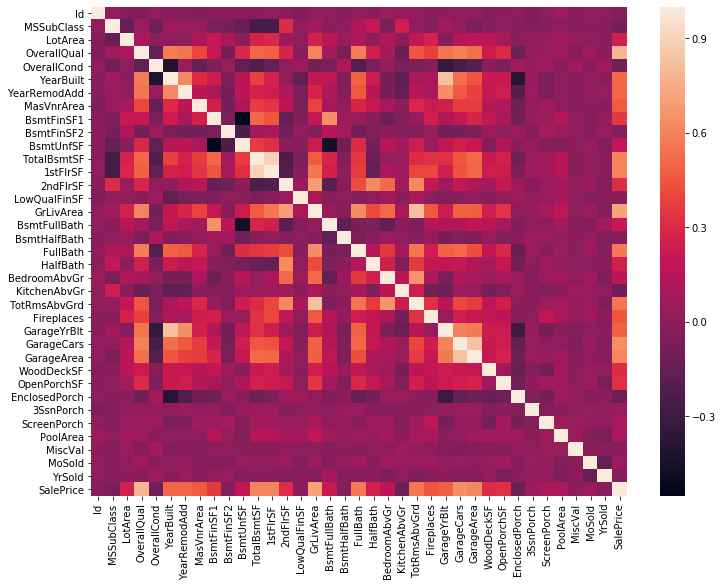

In [75]:
#とりあえず相関が高いものを探す。
hm = df_data.corr()
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(hm)

In [76]:
idx = hm.nlargest(10, "SalePrice")["SalePrice"].index

In [77]:
hm_largest = df_data[idx]
hm_largest

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,1stFlrSF,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt
0,208500,7,1710,2,548,856,856,2,8,2003
1,181500,6,1262,2,460,1262,1262,2,6,1976
2,223500,7,1786,2,608,920,920,2,6,2001
3,140000,7,1717,3,642,961,756,1,7,1915
4,250000,8,2198,3,836,1145,1145,2,9,2000
...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,2,7,1999
1456,210000,6,2073,2,500,2073,1542,2,7,1978
1457,266500,7,2340,1,252,1188,1152,2,9,1941
1458,142125,5,1078,1,240,1078,1078,1,5,1950


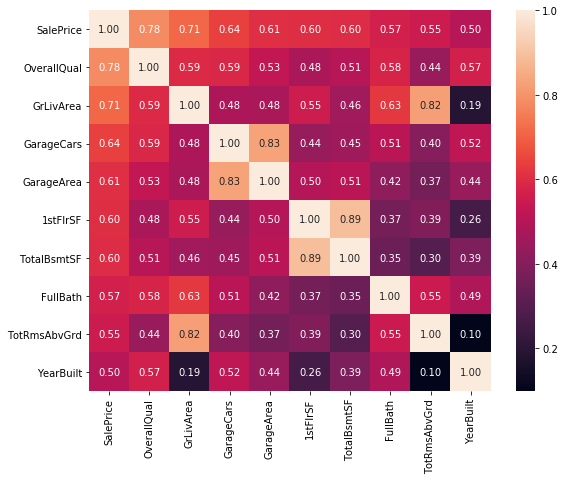

In [78]:
hml = hm_largest.corr()
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(hml, annot=True, fmt=".2f")

GarageCarsとGarageArea、１stFlrSFとTotalBsmtSFは相関が高く、それぞれどちらか一方を失っても情報は失われないと考えられるため
列から削除してみる

In [79]:
hm_largest.columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       '1stFlrSF', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [80]:
cols =['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']

In [81]:
df_data1 = hm_largest[cols]
df_data1

,SalePrice,OverallQual,GrLivArea,GarageArea,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,208500,7,1710,548,856,2,8,2003
1,181500,6,1262,460,1262,2,6,1976
2,223500,7,1786,608,920,2,6,2001
3,140000,7,1717,642,961,1,7,1915
4,250000,8,2198,836,1145,2,9,2000
...,...,...,...,...,...,...,...,...
1455,175000,6,1647,460,953,2,7,1999
1456,210000,6,2073,500,2073,2,7,1978
1457,266500,7,2340,252,1188,2,9,1941
1458,142125,5,1078,240,1078,1,5,1950


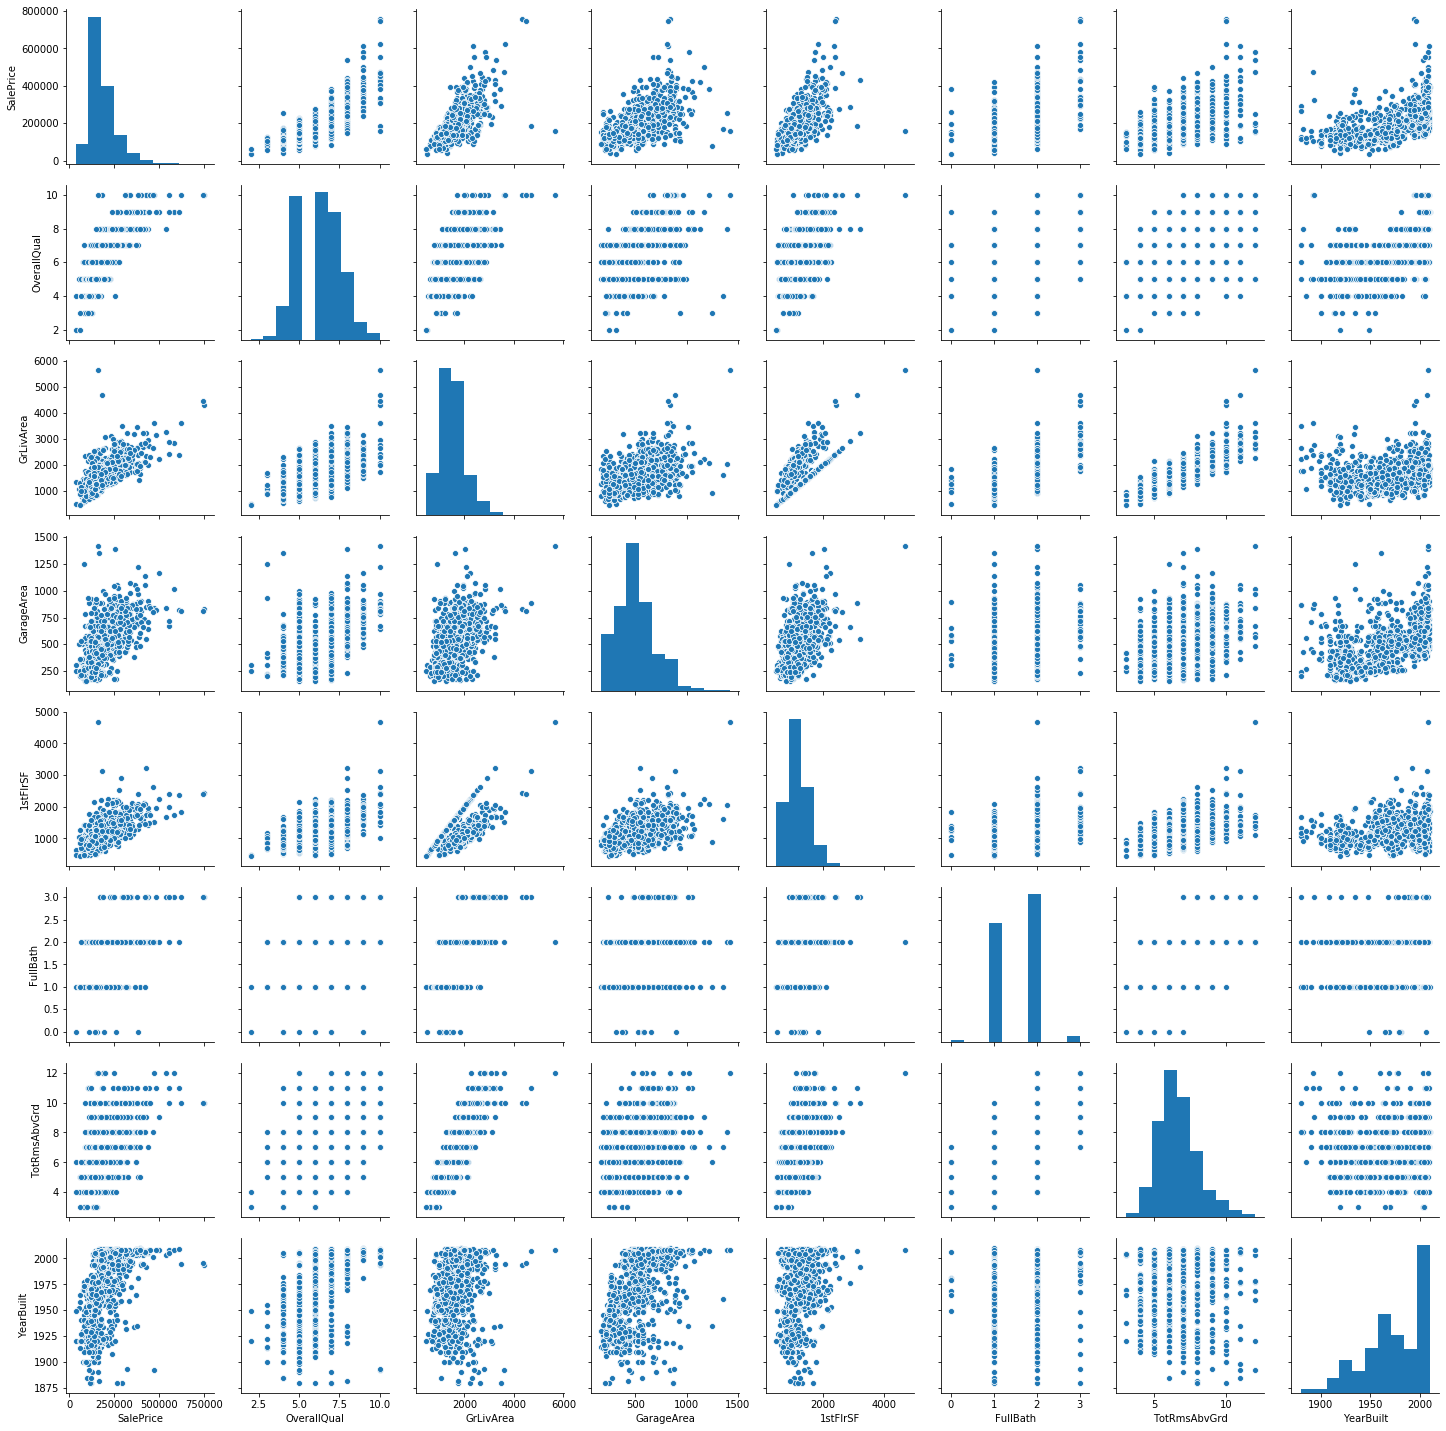

In [82]:
sns.pairplot(df_data1)

df_data1で学習させてみる。
<br>とりあえず
<br>①線形回帰
<br>②多項式
<br>③ランダムフォレスト回帰
<br>④アダブースト
<br>⑤アダブースト（グリッドサーチ）
<br>⑥ロバスト回帰
<br>

In [83]:
X = df_data1.iloc[:, 1:]
y = df_data1["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [84]:
# ①線形回帰

In [85]:
lr = LinearRegression()
lr.fit(X_train_std, y_train)

y_train_pred = lr.predict(X_train_std)
y_test_pred = lr.predict(X_test_std)

print("R2_Score(train) : %.3f" % r2_score(y_train, y_train_pred))
print("R2_Score(train) : %.3f" % r2_score(y_test, y_test_pred))

print("mean_squared_error(train) : %.2e" % mean_squared_error(y_train, y_train_pred))
print("mean_squared_error(test) : %.2e" % mean_squared_error(y_test, y_test_pred))

R2_Score(train) : 0.810
R2_Score(train) : 0.622
mean_squared_error(train) : 1.17e+09
mean_squared_error(test) : 2.40e+09


In [86]:
# ②多項式(二次)

In [87]:
from sklearn.preprocessing import PolynomialFeatures
pr = LinearRegression()
quadrastic = PolynomialFeatures(degree=2)

quadrastic.fit(X_train_std)
X_train_quad = quadrastic.transform(X_train_std)
X_test_quad = quadrastic.transform(X_test_std)

In [88]:
pr.fit(X_train_quad, y_train)

y_train_pred = pr.predict(X_train_quad)
y_test_pred = pr.predict(X_test_quad)

print("R2_Score(train) : %.3f" % r2_score(y_train, y_train_pred))
print("R2_Score(train) : %.3f" % r2_score(y_test, y_test_pred))

print("mean_squared_error(train) : %.2e" % mean_squared_error(y_train, y_train_pred))
print("mean_squared_error(test) : %.2e" % mean_squared_error(y_test, y_test_pred))

R2_Score(train) : 0.868
R2_Score(train) : 0.555
mean_squared_error(train) : 8.09e+08
mean_squared_error(test) : 2.82e+09


In [89]:
# ③ランダムフォレスト回帰をグリッドサーチ（RandomforestReg）

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
grid_params = {'max_depth': [1, 100, 1000],
                            'criterion': ['mse', 'gini', 'entropy', 'error'],
                            'n_estimators': [1, 100, 1000]}

gs = GridSearchCV(estimator=forest, 
                                  param_grid=grid_params,
                                  cv = 10,
                                  n_jobs=-1,
                                  scoring="r2")
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8337494894862122
{'criterion': 'mse', 'max_depth': 100, 'n_estimators': 1000}


In [91]:
mod = gs.best_estimator_
mod.fit(X_train, y_train)
y_train_pred = mod.predict(X_train)
y_test_pred = mod.predict(X_test)

print("R2_Score(train) : %.3f" % r2_score(y_train, y_train_pred))
print("R2_Score(train) : %.3f" % r2_score(y_test, y_test_pred))

print("mean_squared_error(train) : %.2e" % mean_squared_error(y_train, y_train_pred))
print("mean_squared_error(test) : %.2e" % mean_squared_error(y_test, y_test_pred))

R2_Score(train) : 0.978
R2_Score(train) : 0.743
mean_squared_error(train) : 1.35e+08
mean_squared_error(test) : 1.63e+09


In [92]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [93]:
# ④アダブースト

In [94]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(criterion="mse",
                                                     max_depth=5,
                                                     random_state=1)
ada = AdaBoostRegressor(base_estimator=tree,
                                               learning_rate=0.1,
                                               n_estimators=1000,
                                               random_state=1)
ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

print("R2_Score(train) : %.3f" % r2_score(y_train, y_train_pred))
print("R2_Score(train) : %.3f" % r2_score(y_test, y_test_pred))

print("mean_squared_error(train) : %.2e" % mean_squared_error(y_train, y_train_pred))
print("mean_squared_error(test) : %.2e" % mean_squared_error(y_test, y_test_pred))

R2_Score(train) : 0.922
R2_Score(train) : 0.737
mean_squared_error(train) : 4.81e+08
mean_squared_error(test) : 1.67e+09


In [95]:
#⑤アダブースト（決定木）をグリッドサーチ

In [96]:
grid_params = {"learning_rate": [0.001, 0.01, 0.1, 1., 10., 100.],
                            "n_estimators": [100, 1000]}
gs = GridSearchCV(estimator=ada,
                                  param_grid=grid_params,
                                  cv=10,
                                  n_jobs=-1,
                                  scoring="r2"
                 )
gs.fit(X_train, y_train)
mod = gs.best_estimator_

mod.fit(X_train, y_train)
y_train_pred = mod.predict(X_train)
y_test_pred = mod.predict(X_test)

print("R2_Score(train) : %.3f" % r2_score(y_train, y_train_pred))
print("R2_Score(train) : %.3f" % r2_score(y_test, y_test_pred))

print("mean_squared_error(train) : %.2e" % mean_squared_error(y_train, y_train_pred))
print("mean_squared_error(test) : %.2e" % mean_squared_error(y_test, y_test_pred))

R2_Score(train) : 0.921
R2_Score(train) : 0.739
mean_squared_error(train) : 4.85e+08
mean_squared_error(test) : 1.66e+09


In [97]:
print(gs.best_score_)
print(gs.best_params_)

0.8175601336699454
{'learning_rate': 1.0, 'n_estimators': 100}


In [98]:
#⑥ロバスト回帰モデルを使って外れ値を取り除いて学習させてみる

In [99]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),
                                                 max_trials=1000,
                                                 min_samples=100,
                                                 loss="absolute_loss",
                                                 residual_threshold=100000.0,
                                                 random_state=1)
ransac.fit(X_train, y_train)
y_train_pred = ransac.predict(X_train)
y_test_pred = ransac.predict(X_test)

print("R2_Score(train) : %.3f" % r2_score(y_train, y_train_pred))
print("R2_Score(train) : %.3f" % r2_score(y_test, y_test_pred))

print("mean_squared_error(train) : %.2e" % mean_squared_error(y_train, y_train_pred))
print("mean_squared_error(test) : %.2e" % mean_squared_error(y_test, y_test_pred))

R2_Score(train) : 0.807
R2_Score(train) : 0.635
mean_squared_error(train) : 1.18e+09
mean_squared_error(test) : 2.32e+09


全体的に過学習している。交差検証等使って汎化性能あげた方がいい。グリッドサーチと交差検証はセット？